<a href="https://colab.research.google.com/github/Gautam1610/signature-extraction-pan/blob/main/Pan_signature_extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! pip install detecto==1.1.5

In [3]:
from detecto import core, utils, visualize
import pandas as pd
import numpy as np
from google.colab import drive
import cv2
import matplotlib.pyplot as plt


In [4]:
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
model_v2 = core.Model.load('/content/drive/My Drive/Colab Notebooks/Signature Extraction/model_weights_v2.pth', ['signature'])


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=FasterRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=FasterRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth" to /root/.cache/torch/hub/checkpoints/fasterrcnn_resnet50_fpn_coco-258fb6c6.pth
100%|██████████| 160M/160M [00:01<00:00, 111MB/s]


['signature']
tensor([[ 580.0842, 1038.6495,  796.9568, 1137.6204]])
tensor([0.9945])


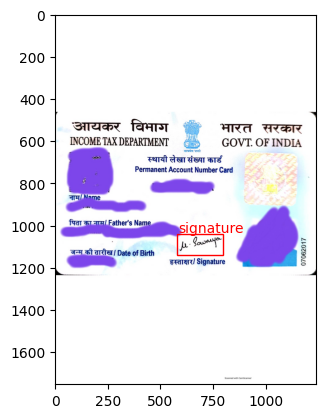

In [7]:
image1 = utils.read_image('/content/pan_test.jpg')
predictions = model_v2.predict(image1)

# predictions format: (labels, boxes, scores)
labels, boxes, scores = predictions

# ['alien', 'bat', 'bat']
print(labels)

#           xmin       ymin       xmax       ymax
# tensor([[ 569.2125,  203.6702, 1003.4383,  658.1044],
#         [ 276.2478,  144.0074,  579.6044,  508.7444],
#         [ 277.2929,  162.6719,  627.9399,  511.9841]])
print(boxes)

# tensor([0.9952, 0.9837, 0.5153])
print(scores)
visualize.show_labeled_image(image1, boxes, labels)

In [8]:


import torch
values, indices = torch.max(scores, 0)
print(values , indices)
print(boxes[indices])

tensor(0.9945) tensor(0)
tensor([ 580.0842, 1038.6495,  796.9568, 1137.6204])


580.0841674804688 1038.6495361328125 796.9568481445312 1137.620361328125


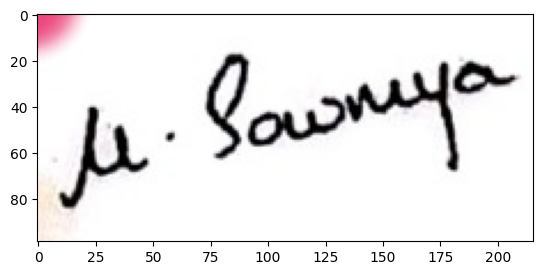

In [9]:
# crop_img = imgcv[tl[1]:br[1], tl[0]:br[0]]
img = cv2.imread("/content/pan_test.jpg")
threshold_prob = 0.90
if len(labels) > 0:
  values, indices = torch.max(scores, 0)
  if values > threshold_prob:
    pred_box =  boxes[indices]
    tl_0 = float(pred_box[0])
    tl_1=float(pred_box[1])
    br_0 = float(pred_box[2])
    br_1 = float(pred_box[3])
    print(tl_0 ,tl_1 , br_0 ,br_1)
    # crop_img=  img[538:617,64:274]
    crop_img =  img[int(tl_1):int(br_1), int(tl_0):int(br_0)]
    plt.imshow(crop_img)
    plt.show()
else:
  print("No Signature found")

['signature', 'signature']
tensor([[ 43.9456, 327.3703, 164.2356, 379.6653],
        [331.8346,  26.9769, 380.1967, 104.9611]])
tensor([0.9859, 0.0949])


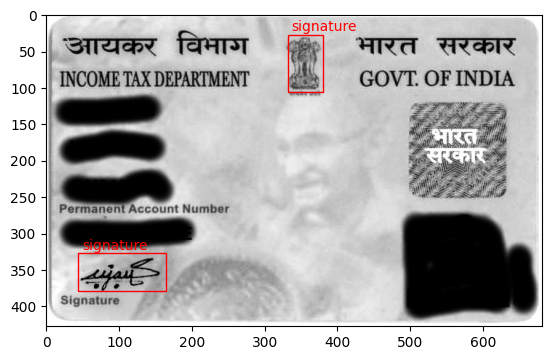

In [10]:
image1 = utils.read_image('/content/pan_test2.jpg')
predictions = model_v2.predict(image1)

# predictions format: (labels, boxes, scores)
labels, boxes, scores = predictions

# ['alien', 'bat', 'bat']
print(labels)

#           xmin       ymin       xmax       ymax
# tensor([[ 569.2125,  203.6702, 1003.4383,  658.1044],
#         [ 276.2478,  144.0074,  579.6044,  508.7444],
#         [ 277.2929,  162.6719,  627.9399,  511.9841]])
print(boxes)

# tensor([0.9952, 0.9837, 0.5153])
print(scores)
visualize.show_labeled_image(image1, boxes, labels)

43.94558334350586 327.3703308105469 164.23562622070312 379.6652526855469


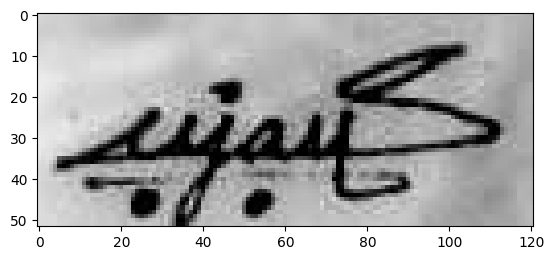

In [14]:
img = cv2.imread("/content/pan_test2.jpg")
threshold_prob = 0.90
if len(labels) > 0:
  values, indices = torch.max(scores, 0)
  if values > threshold_prob:
    pred_box =  boxes[indices]
    tl_0 = float(pred_box[0])
    tl_1=float(pred_box[1])
    br_0 = float(pred_box[2])
    br_1 = float(pred_box[3])
    print(tl_0 ,tl_1 , br_0 ,br_1)
    # crop_img=  img[538:617,64:274]
    crop_img =  img[int(tl_1):int(br_1), int(tl_0):int(br_0)]
    plt.imshow(crop_img)
    plt.show()
else:
  print("No Signature found")